In [1]:
# %matplotlib widget
# import ipympl
import sys
sys.path.append("../../library/")
sys.path.append("../lib/")
import numpy as np
import matplotlib.pyplot as plt
import read_data as rd
from scipy.optimize import minimize_scalar
from sub_plot import *
from defaultPlot import *
from dataProcess import *
from stringFormat import *

# Read Data

In [2]:
time = {}
points = {}
#* ---------------------------------------------------------
orderParameter = {}
meanClusterSize = {}
orderParameterVariance = {}
interEventTime = {}
secondMoment = {}
netOrderParameter = {}
netSecondMoment={}
netOrderParameterVariance = {}
singleOrderParameter = {}
#* ---------------------------------------------------------
orderParameterDist_t = {}
orderParameterDist = {}
clusterSizeDist_op = {}
clusterSizeDist = {}
#* ---------------------------------------------------------
t_var_c = {}
m_var_c = {}
t_mcs_c = {}
m_mcs_c = {}

In [3]:
# for networkSize in networkSizeList:
for networkSize in [10000]:
    time[networkSize] = np.arange(0.0, 1.0, 1/networkSize)
    # for acceptanceThreshold in acceptanceThresholdList:
    for acceptanceThreshold in [0.5]:
        current = networkSize, acceptanceThreshold
        points[current] = {}
        #* -------------------------------------------------------
        orderParameter[current] = rd.read("orderParameter", networkSize, acceptanceThreshold)
        meanClusterSize[current] = rd.read("meanClusterSize", networkSize, acceptanceThreshold)
        secondMoment[current] = rd.read("secondMoment", networkSize, acceptanceThreshold)
        orderParameterVariance[current] = networkSize * (secondMoment[current] - orderParameter[current] ** 2.0)
        interEventTime[current] = rd.read("interEventTime", networkSize, acceptanceThreshold)
        #* ---------------------------------------------------------
#         orderParameterDist_t[current] = rd.extractRepeater("orderParameterDist", networkSize, acceptanceThreshold)
#         for t in orderParameterDist_t[current]:
#             orderParameterDist[current, t] = rd.read("orderParameterDist", networkSize, acceptanceThreshold, t)
#         clusterSizeDist_op[current] = rd.extractRepeater("clusterSizeDist", networkSize, acceptanceThreshold)
#         for op in clusterSizeDist_op[current]:
#             clusterSizeDist[current, op] = rd.read("clusterSizeDist", networkSize, acceptanceThreshold, op)
        #* ---------------------------------------------------------
#         netOrderParameter[current] = {}
#         netSecondMoment[current] = {}
#         netOrderParameterVariance[current] = {}
#         for accumulate in ["78"]:
#             for state in ["sub", "super"]:
#                 netOrderParameter[current][accumulate + state] = rd.read("netOrderParameter", networkSize, acceptanceThreshold, accumulate + state)
#                 netSecondMoment[current][accumulate + state] = rd.read("netSecondMoment", networkSize, acceptanceThreshold, accumulate + state)
#                 netOrderParameterVariance[current][accumulate + state] = netSecondMoment[current][accumulate + state][0],  networkSize * (netSecondMoment[current][accumulate + state][1] - netOrderParameter[current][accumulate + state][1] ** 2.0)

No file at interEventTime, N: 1.0e+04, G: 0.5


In [4]:
current = networkSize, acceptanceThreshold = 10000, 0.5

# Finding t_a2,m_a2

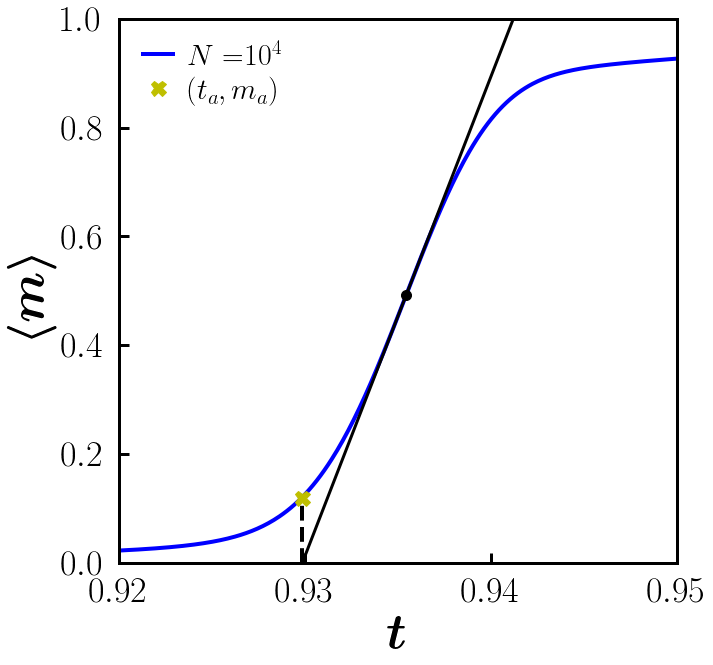

In [5]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'b-', label=latex_string("N=") + latex_sci(networkSize, 3))
t_a2, m_a2, t_inflection, m_inflection = rd.get_ta_inflection(networkSize, orderParameter[current])
a = m_inflection/(t_inflection-t_a2)
ax.plot([t_a2, t_inflection + (1-m_inflection)/a], [0, 1], 'k-', linewidth=3)
ax.plot(t_inflection, m_inflection, "ko", markersize=10)
ax.plot([t_a2,t_a2], [0, m_a2], 'k--')
ax.plot(t_a2, m_a2, 'yX', label=latex_string("(t_a, m_a)"))

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim([0, 1])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="upper left", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


In [200]:
points[current]["t_a2"], points[current]["m_a2"], points[current]["t_inflection"], points[current]["m_inflection"] = t_a2, m_a2, t_inflection, m_inflection
print(t_a2,m_a2,t_inflection, m_inflection)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_a2: " + str(t_a2) + "\n")
    file.write("m_a2: " + str(m_a2) + "\n")
    file.write("t_inflection: " + str(t_inflection) + "\n")
    file.write("m_inflection: " + str(m_inflection) + "\n")

0.9298781517812903 0.1197360645800916 0.93545 0.49153752465495515


# Finding t_c, m_c

In [201]:
print(", ".join('{:.6f}'.format(op) for op in clusterSizeDist_op[current]))

0.000100, 0.000200, 0.000300, 0.000400, 0.000500, 0.000600, 0.000700, 0.000800, 0.000900, 0.001000, 0.001100, 0.001200, 0.001300, 0.001400, 0.001500, 0.001600, 0.001700, 0.001800, 0.001900, 0.002000, 0.002100, 0.002200, 0.002300, 0.002400, 0.002500, 0.002700, 0.002800, 0.002900, 0.003100, 0.003200, 0.003400, 0.003500, 0.003700, 0.003900, 0.004100, 0.004300, 0.004500, 0.004700, 0.004900, 0.005200, 0.005400, 0.005700, 0.005900, 0.006200, 0.006500, 0.006800, 0.007200, 0.007500, 0.007900, 0.008300, 0.008600, 0.009100, 0.009500, 0.010000, 0.020000, 0.030000, 0.040000, 0.050000, 0.060000, 0.069900, 0.080000, 0.090000, 0.099900, 0.110000, 0.120000, 0.130000, 0.140000, 0.150000, 0.160000, 0.170000, 0.180000, 0.190000, 0.200000, 0.210000, 0.220000, 0.230000, 0.240000, 0.250000, 0.260000, 0.270000, 0.280000, 0.290000, 0.300000, 0.310000, 0.320000, 0.330000, 0.340000, 0.350000, 0.360000, 0.370000, 0.380000, 0.390000, 0.400000, 0.410000, 0.420000, 0.430000, 0.440000, 0.450000, 0.460000, 0.470000, 

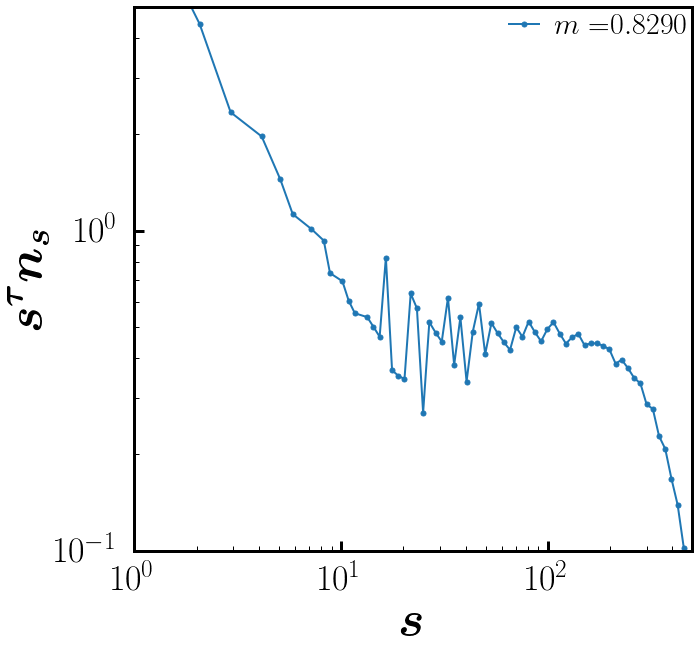

In [208]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotCSD_tau(op, label=None, color=None):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.03)
    dist *= np.power(csd, tau[acceptanceThreshold])
    label_name = label if label else latex_string("m=") + latex_float(op, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)


# plotCSD_tau(0.827)
# plotCSD_tau(0.828)
plotCSD_tau(0.829)

y = 4.33e-1
# ax.plot([1,1e6], [y,y], 'k-', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1)
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("s^\\tau n_s"))
ax.set_xlim([1, networkSize/20])
# ax.set_ylim([0.3, 0.6])
ax.set_ylim([0.1, 5])
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

# fig.savefig("../data/mBFW/fig/csd_tau(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


In [209]:
m_c=0.829
points[current]["m_c"] = m_c
points[current]["t_c"] = t_c = rd.op2t(orderParameter[current], m_c)/networkSize
print(t_c, m_c)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_c: " + str(t_c) + "\n")
    file.write("m_c: " + str(m_c) + "\n")

0.9404 0.829


# Check m_a2

In [210]:
char_size, char_dist = {}, {}
for op in clusterSizeDist_op[current]:
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.07)
    dist *= np.power(csd, tau[acceptanceThreshold])
    start, window = 20,4
    try:
        max_index = np.argmax(dist[start:])+start
    except ValueError:
        char_size[op] = 1
        char_dist[op] = 1
        continue
    fit_csd = np.log10(csd[max_index-window : max_index+2])
    fit_dist = np.log10(dist[max_index-window : max_index+2])
    poly = np.poly1d(np.polyfit(fit_csd, fit_dist, 4))
    s_star = minimize_scalar(-poly, bounds=[fit_csd[0], fit_csd[-1]], method='bounded')
    s_star = np.power(10.0, s_star.x)
    char_size[op] = s_star
    char_dist[op] = np.power(10.0, poly(np.log10(s_star)))

print(max(char_dist, key=char_dist.get))
tList = rd.opList2tList(orderParameter[current], clusterSizeDist_op[current])/networkSize


0.06


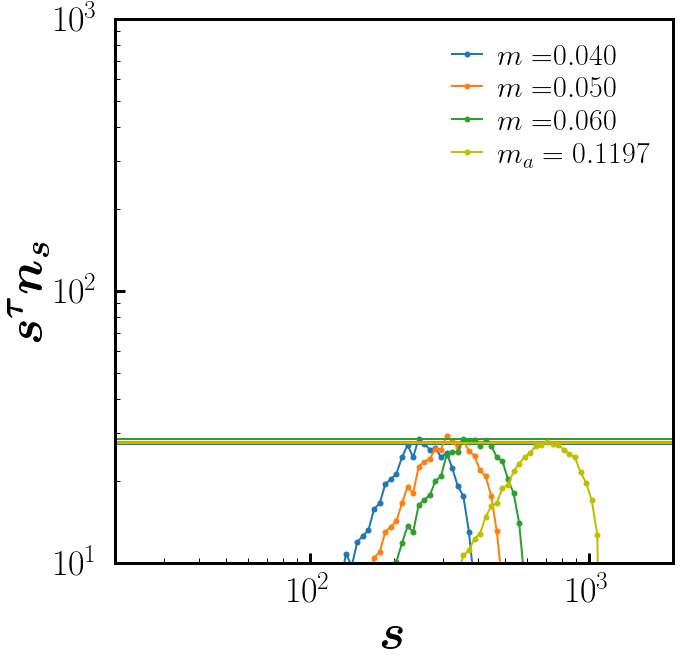

In [211]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

xlim = [networkSize/500, networkSize/5]
def plotCSD_tau(op, label=None, color=None):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.02)
    dist *= np.power(csd, tau[acceptanceThreshold])
    label_name = label if label else latex_string("m=") + latex_float(op, 3)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, markersize=5, linewidth=2, color=color_name)
    ax.plot(xlim, [char_dist[op], char_dist[op]], '-', color=color_name, linewidth=2)

plotCSD_tau(0.04)
plotCSD_tau(0.05)
plotCSD_tau(0.06)
plotCSD_tau(0.1100, latex_string("m_a={:.4f}".format(m_a2)), color='y')

ax.set_xlim([networkSize/500, networkSize/5])
ax.set_ylim(10, 1000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("s^\\tau n_s"))
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/csd_tau(N{:.1e},G{:.1f})_peak.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


# Finding t_b,m_b

In [212]:
char = np.array(list(char_size.values()))
t_b = tList[np.argmax(char)]
m_b = orderParameter[current][int(t_b*networkSize)]

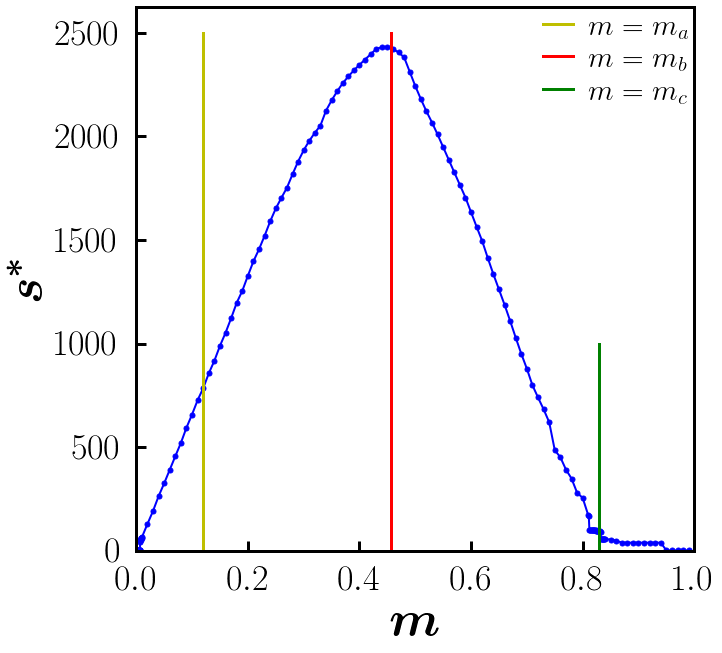

In [213]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

ax.plot(char_size.keys(), char_size.values(), 'bo-', markersize=5, linewidth=2)
ax.plot([m_a2, m_a2], [1, 0.25 * networkSize], 'y-', linewidth=3, label=latex_string("m=m_a"))
ax.plot([m_b, m_b], [1, 0.25 * networkSize], 'r-', linewidth=3, label=latex_string("m=m_b"))
ax.plot([m_c, m_c], [1, 0.1 * networkSize], 'g-', linewidth=3, label=latex_string("m=m_c"))

ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("s^*"))
ax.legend(loc='upper right', borderpad=0.1, borderaxespad=0.1, fontsize=30)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)

# fig.savefig("../data/mBFW/fig/m_char(N{:.1e},G{:.1f}).pdf".format(*current, tau), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)

fig.show()


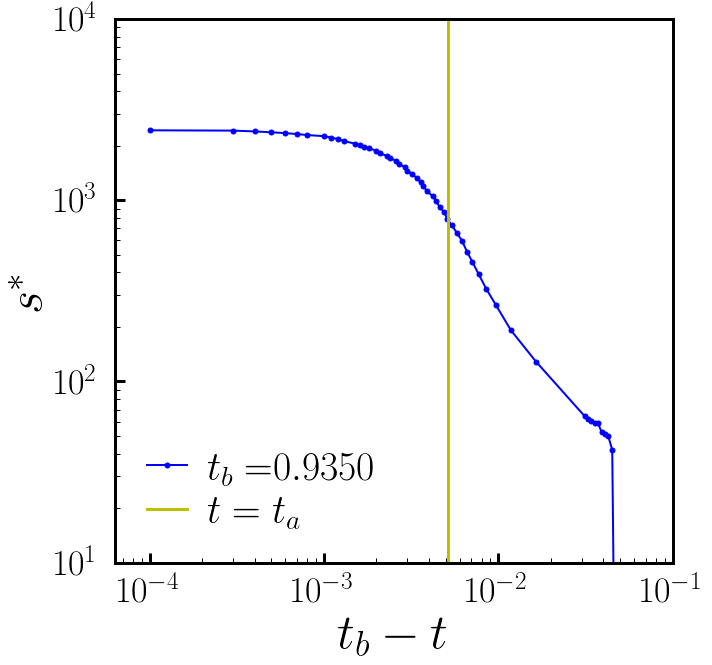

In [214]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotChar(t_b):
    reducedT = t_b-tList
    reducedT, reduced_char = reducedT[reducedT>0], char[reducedT>0]
    ax.plot(reducedT, reduced_char, 'bo-', label=latex_string("t_b=") + latex_float(t_b,4), markersize=5, linewidth=2)

plotChar(t_b)
ax.plot([t_b-t_a2, t_b-t_a2], [10, networkSize], 'y-', label=latex_string("t=t_a"), linewidth=3)

ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_string("t_b-t"))
ax.set_ylabel(latex_string("s^*"))
ax.set_ylim(10, networkSize)
ax.set_xlim(right=1e-1)

# fig.savefig("../data/mBFW/fig/reducedT_char(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

In [215]:
points[current]["t_b"], points[current]["m_b"] = t_b, m_b
print(t_b, m_b)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_b: " + str(t_b) + "\n")
    file.write("m_b: " + str(m_b) + "\n")



0.935 0.4562985296148026


# Find t_a1, m_a1

In [216]:
print(orderParameterDist_t[current])

[0.9204 0.9205 0.9206 0.9207 0.9208 0.9209 0.921  0.9211 0.9212 0.9213
 0.9214 0.9215 0.9216 0.9217 0.9218 0.9219 0.922  0.9221 0.9222 0.9223
 0.9224 0.9225 0.9226 0.9227 0.9228 0.9229 0.923  0.9231 0.9232 0.9233
 0.9234 0.9235 0.9236 0.9237 0.9238 0.9239 0.924  0.9241 0.9242 0.9243
 0.9244 0.9245 0.9246 0.9247 0.9248 0.9249 0.925  0.9251 0.9252 0.9253
 0.9254 0.9255 0.9256 0.9257 0.9258 0.9259 0.926  0.9261 0.9262 0.9263
 0.9264 0.9265 0.9266 0.9267 0.9268 0.9269 0.927  0.9271 0.9272 0.9273
 0.9274 0.9275 0.9276 0.9277 0.9278 0.9279 0.928  0.9281 0.9282 0.9283
 0.9284 0.9285 0.9286 0.9287 0.9288 0.9289 0.929  0.9291 0.9292 0.9293
 0.9294 0.9295 0.9296 0.9297 0.9298 0.9299 0.93   0.9301 0.9302 0.9303
 0.9304 0.9305 0.9306 0.9307 0.9308 0.9309 0.931  0.9311 0.9312 0.9313
 0.9314 0.9315 0.9316 0.9317 0.9318 0.9319 0.932  0.9321 0.9322 0.9323
 0.9324 0.9325 0.9326 0.9327 0.9328 0.9329 0.933  0.9331 0.9332 0.9333
 0.9334 0.9335 0.9336 0.9337 0.9338 0.9339 0.934  0.9341 0.9342 0.9343
 0.934

last: (0.868500, 3.26e-05), second last: (0.871500, 3.26e-05)


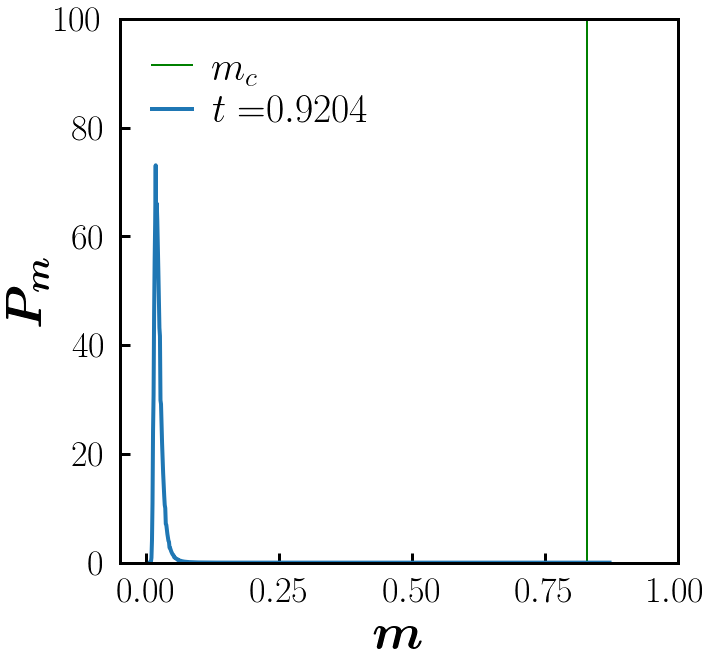

In [221]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotOPD(t, label=None, color=None):
    op, dist = orderParameterDist[current, t]
    op, dist = distLinBin(op/networkSize, dist, delta=1e-3)
    label_name = label if label else latex_string("t=") + latex_float(t, 4)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']

    ax.plot(op, dist, label=label_name, color=color_name)
    print("last: ({:.6f}, {:.2e}), second last: ({:.6f}, {:.2e})".format(op[-2], dist[-2], op[-1], dist[-1]))
ax.plot([m_c, m_c], [0, 100], 'g-', label=latex_string("m_c"), linewidth=2)


plotOPD(0.9204)

ax.legend(loc="best")
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("P_m"))
ax.set_ylim(0, 100)
ax.set_xlim([-0.05, 1])
# fig.savefig("../data/mBFW/fig/orderParameterDist(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
fig.show()


In [222]:
t_a1 = 0.9204
m_a1 = orderParameter[current][int(t_a1*networkSize)]
print(t_a1, m_a1)

0.9204 0.0229834742306756


# Check t_a1, m_a1

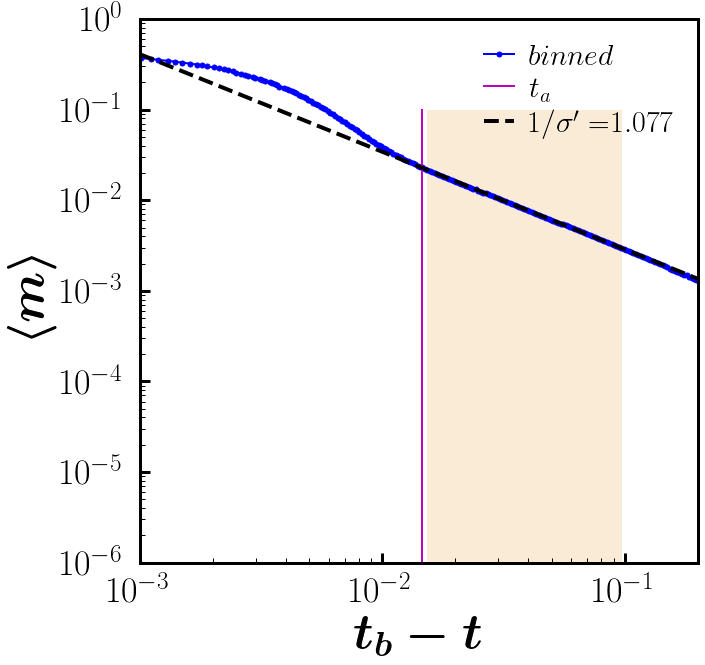

In [223]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
fitRange = np.array([-45,-25])
delta_exponent = 0.01
fitRange *= int(0.04/delta_exponent)

def plot_reducedT_op(fit=True):
    reducedT, op = (t_b - time[networkSize]) * networkSize, orderParameter[current]
    reducedT, op = avgLogBin(reducedT[reducedT>0], op[reducedT>0], delta_exponent=delta_exponent)
    reducedT, op = reducedT/networkSize, op
    ax.plot(reducedT, op, 'bo-', markersize=5, linewidth=2, label=latex_string("binned"))
    ax.plot([t_b-t_a1, t_b-t_a1], [1e-7, 1e-1], 'm-', linewidth=2, label=latex_string("t_a"))

    if fit:
        fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], op[fitRange[0]:fitRange[1]], offset=-0.0, start = 1e-3, end=5e-1)
        ax.plot(fitX, fitY, 'k--', label=latex_string("1/\sigma'=") + latex_float(-alpha, 3))
        ax.fill_betweenx([1e-7, 1e-1], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')
    return -alpha

sigma_1 = plot_reducedT_op()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.set_xlim([1e-3, 0.2])
ax.set_ylim([1e-6, 1])
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/reducedT_op(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


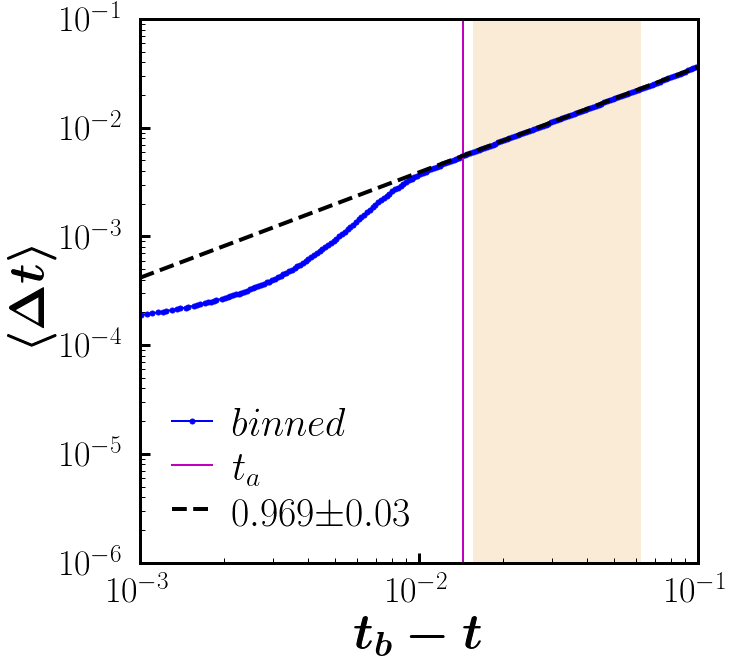

In [189]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
fitRange = np.array([-40,-25])
delta_exponent = 0.01
fitRange *= int(0.04/delta_exponent)

def plot_reducedT_iet(fit=True):
    t, iet = interEventTime[current]
    reducedT = t_b*networkSize-t
    reducedT, iet = avgLogBin(reducedT[reducedT>0], iet[reducedT>0], delta_exponent=delta_exponent)
    reducedT, iet = reducedT/networkSize, iet/networkSize
    ax.plot(reducedT, iet, 'bo-', markersize=5, linewidth=2, label=latex_string("binned"))
    ax.plot([t_b-t_a1, t_b-t_a1], [1e-7, 1e-1], 'm-', linewidth=2, label=latex_string("t_a"))

    if fit:
        fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], iet[fitRange[0]:fitRange[1]], offset=-0.0, start = 1e-3, end=5e-1)
        ax.plot(fitX, fitY, 'k--', label=latex_float(alpha, 3) + latex_string("\pm 0.03"))
        ax.fill_betweenx([1e-7, 1e-1], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')

plot_reducedT_iet()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("\langle \\Delta t \\rangle"))
ax.set_xlim([1e-3, 1e-1])
ax.set_ylim([1e-6, 1e-1])
ax.legend(loc='best')

# fig.savefig("../data/mBFW/fig/reducedT_iet(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


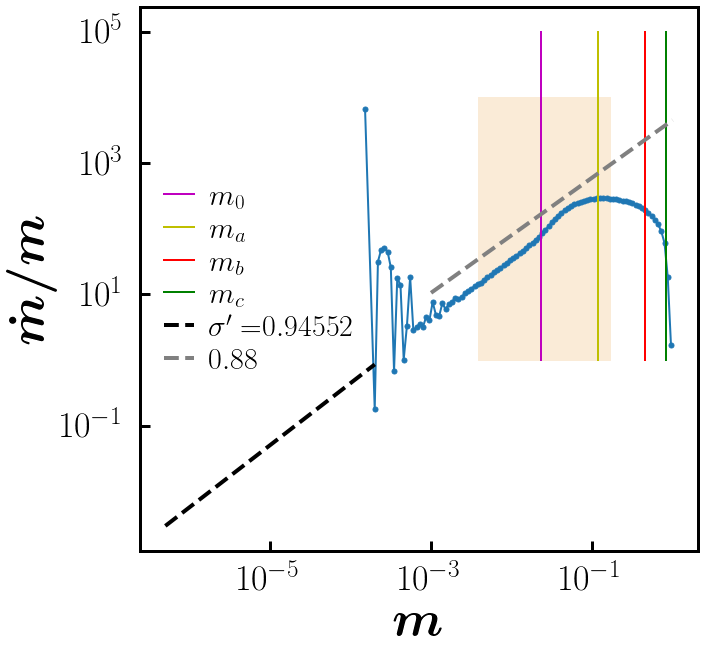

In [224]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotDotOP(fit=True):
    op = orderParameter[current] * networkSize
    dot_op = (op[1:] - op[:-1]) * networkSize
    op = (op[1:] + op[:-1]) / 2.0
    x, y = avgLogBin(op, dot_op / op, delta_exponent=0.04)
    x /= networkSize
    ax.plot(x, y, 'o-', markersize=5, linewidth=2)

    if fit:
        ax.plot([m_a1,m_a1], [1,1e5], 'm-', linewidth=2, label=latex_string("m_0"))
        ax.plot([m_a2,m_a2], [1,1e5], 'y-', linewidth=2, label=latex_string("m_a"))
        ax.plot([m_b, m_b], [1,1e5], 'r-', linewidth=2, label=latex_string("m_b"))
        ax.plot([m_c, m_c], [1,1e5], 'g-', linewidth=2, label=latex_string("m_c"))
        fitRange1 = 33,53
        fitRange2 = -50, -20
        fitX1, fitY1, alpha1, _ = logFit(x[fitRange1[0]:fitRange1[1]], y[fitRange1[0]:fitRange1[1]], offset=0.0, start=5e-7, end=2e-4)
        ax.plot(fitX1, fitY1, 'k--', label=latex_string("\sigma'=") + latex_float(alpha1, 5))
        ax.fill_betweenx([1, 1e4], [x[fitRange1[0]], x[fitRange1[0]]], [x[fitRange1[1]], x[fitRange1[1]]], color='antiquewhite')
        fitX2, fitY2, alpha2, _ = logFit(x[fitRange2[0]:fitRange2[1]], y[fitRange2[0]:fitRange2[1]], offset=-0.3, start=1e-3, end=1)
        ax.plot(fitX2, fitY2, '--', color='grey', label=latex_float(alpha2, 2))
        ax.fill_betweenx([1, 1e4], [x[fitRange2[0]], x[fitRange2[0]]], [x[fitRange2[1]], x[fitRange2[1]]], color='antiquewhite')
    return alpha1

sigma = plotDotOP()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("\dot{m} / m"))
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/dotOP(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


In [225]:
mean_sigma = (sigma + 1.0/sigma_1)/2
error = np.abs(sigma - mean_sigma)
print(mean_sigma, error)

0.9368924558662173 0.008626103732465529


In [226]:
points[current]["t_a1"], points[current]["m_a1"] = t_a1, m_a1
print(t_a1, m_a1)
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_a1: " + str(t_a1) + "\n")
    file.write("m_a1: " + str(m_a1) + "\n")

0.9204 0.0229834742306756


# Finding t_c with susceptibility

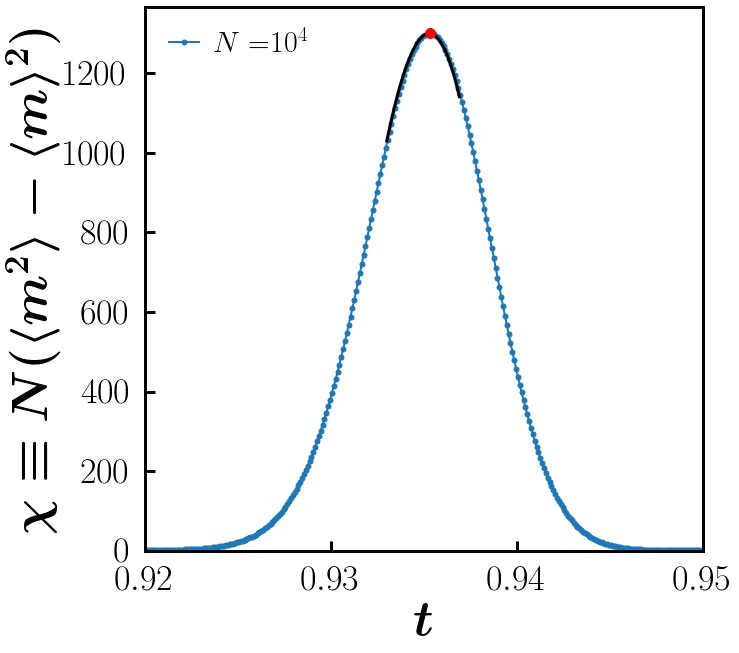

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_rasterized(True)

def plotOPV(region=None, fit=False):
    if region:
        t, opv = netOrderParameterVariance[current][region]
        t, opv = t/networkSize, np.nan_to_num(opv, 0.0)
    else:
        t, opv = time[networkSize], orderParameterVariance[current]
    bin_t, bin_opv = avgLinBin(t, opv)
    ax.plot(bin_t, bin_opv, 'o-', markersize=5, linewidth=2, label=latex_string("N=") + latex_sci(networkSize))

    if fit:
        fitIndex = int(chi_fitRange[current][0] * networkSize), int(chi_fitRange[current][1] * networkSize)
        fit_poly = np.poly1d(np.polyfit(t[fitIndex[0]:fitIndex[1]], opv[fitIndex[0]:fitIndex[1]], 3))
        max_index = np.argmax(fit_poly(t[fitIndex[0]:fitIndex[1]]))
        t_c, m_c = t[fitIndex[0] + max_index], orderParameter[current][fitIndex[0] + max_index]
        ax.plot(t[fitIndex[0]:fitIndex[1]], fit_poly(t[fitIndex[0]:fitIndex[1]]), 'k-', linewidth=3)
        ax.plot(t_c, fit_poly(t_c), 'ro', markersize=10)
        t_var_c[current], m_var_c[current] = t_c, m_c

plotOPV(fit=True)
# plotOPV(region="78super")

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim(bottom=0)
ax.legend(loc="upper left", fontsize=30)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\chi \equiv N(\langle m^2 \\rangle - \langle m \\rangle^2)"))

fig.show()


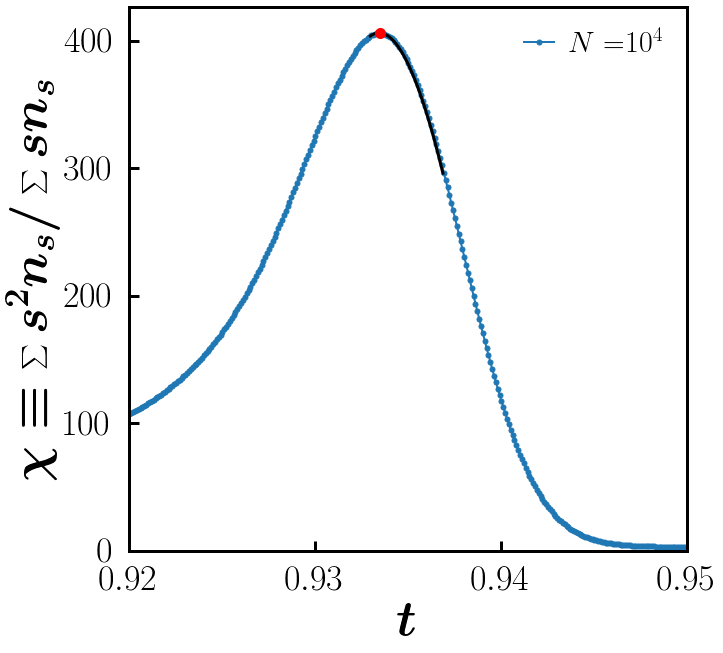

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_rasterized(True)

def plotMCS(fit=True):
    t, mcs = time[networkSize], meanClusterSize[current]
    bin_t, bin_opv = avgLinBin(t, mcs)
    ax.plot(bin_t, bin_opv, 'o-', markersize=5, linewidth=2, label=latex_string("N=") + latex_sci(networkSize))

    if fit:
        fitIndex = int(chi_fitRange[current][0] * networkSize), int(chi_fitRange[current][1] * networkSize)
        fit_poly = np.poly1d(np.polyfit(t[fitIndex[0]:fitIndex[1]], mcs[fitIndex[0]:fitIndex[1]], 3))
        max_index = np.argmax(fit_poly(t[fitIndex[0]:fitIndex[1]]))
        t_c, m_c = t[fitIndex[0] + max_index], orderParameter[current][fitIndex[0] + max_index]
        ax.plot(t[fitIndex[0]:fitIndex[1]], fit_poly(t[fitIndex[0]:fitIndex[1]]), 'k-', linewidth=3)
        ax.plot(t_c, fit_poly(t_c), 'ro', markersize=10)
        t_mcs_c[current], m_mcs_c[current] = t_c, m_c

plotMCS()

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim(bottom = 0)
ax.legend(loc = "best", fontsize = 30)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\chi \equiv \sum s^2 n_s / \sum s n_s"))

fig.show()


In [8]:
points[current]["t_var_c"], points[current]["m_var_c"] = t_var_c[current], m_var_c[current]
points[current]["t_mcs_c"], points[current]["m_mcs_c"] = t_mcs_c[current], m_mcs_c[current]

print(t_var_c[current], m_var_c[current], t_mcs_c[current], m_mcs_c[current])
with open("../data/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_var_c: " + str(t_var_c[current]) + "\n")
    file.write("m_var_c: " + str(m_var_c[current]) + "\n")
    file.write("t_mcs_c: " + str(t_mcs_c[current]) + "\n")
    file.write("n_mcs_c: " + str(m_mcs_c[current]) + "\n")

0.9353 0.4827165707595598 0.9335 0.3301710703830286
